<a href="https://colab.research.google.com/github/seongmingong1/MLprojects/blob/main/Child's_Learning_Success_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic : <br>Child's Learning Success/Failure
----------


    
## Data
    
    
    gender: F/M
    NationaliTy
    PlaceofBirth
    StageID: The school the student attends (elementary, middle, high school)
    GradeID: Grade level
    SectionID: The name of the class the student is in
    Topic: taken subjects
    Semester: The semester taken (first semester/second semester)
    Relation: Relationship of the student to the primary caregiver
    raisedhands: Number of times the student raised their hand during class
    VisITedResources: The number of times the student visited subject announcements
    Discussion: Number of times the student participated in a discussion group
    ParentAnsweringSurvey: Whether parents answered school surveys
    ParentschoolSatisfaction: Whether parents were satisfied with the school.
    StudentAbscenceDays: The number of days the student has been absent (more than or less than 7)
    Class: Grade level (L: Low, M: Middle, H: High)
        
    
    
- Data Resource: https://www.kaggle.com/aljarah/xAPI-Edu-Data


## Step 1. Prepare Data set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d aljarah/xAPI-Edu-Data
!unzip '*.zip'



  0% 0.00/5.54k [00:00<?, ?B/s]
100% 5.54k/5.54k [00:00<00:00, 8.89MB/s]
Archive:  xAPI-Edu-Data.zip
  inflating: xAPI-Edu-Data.csv       


In [ ]:

df = pd.read_csv('xAPI-Edu-Data.csv')

## Step 2. EDA


In [ ]:

df.head()




,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [ ]:
df['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

In [ ]:
df['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

In [ ]:
df['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

<Axes: xlabel='raisedhands', ylabel='Count'>

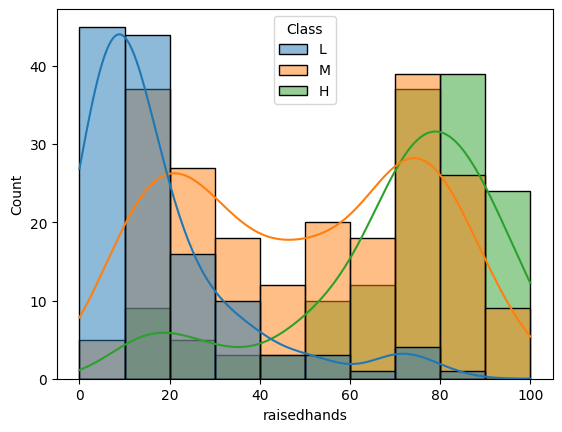

In [ ]:

sns.histplot(x='raisedhands',data=df, hue='Class', hue_order=['L','M','H'], kde=True)
#Students who raise their hands a lot have higher grades. Notice the distinctive twin peaks.


<Axes: xlabel='AnnouncementsView', ylabel='Count'>

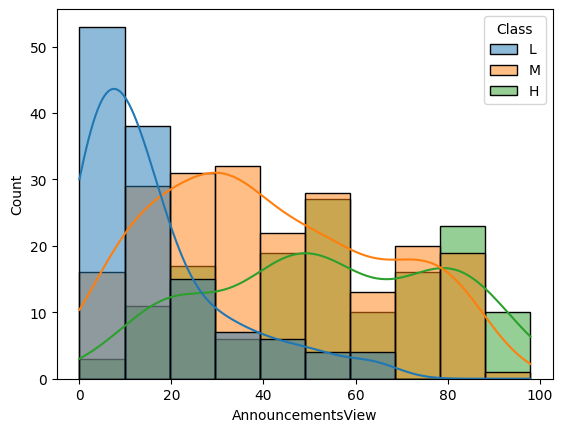

In [ ]:
sns.histplot(x='AnnouncementsView', data=df, hue='Class', hue_order=['L','M','H'], kde=True)
#Announcements outside of class aren't explicitly related to grades.

<Axes: xlabel='VisITedResources', ylabel='Count'>

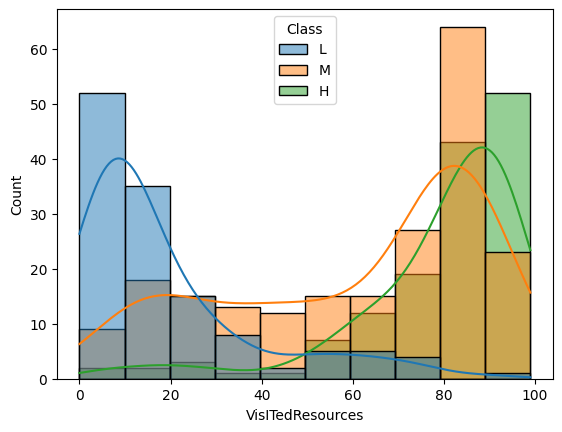

In [ ]:
sns.histplot(x='VisITedResources', data=df, hue='Class', hue_order=['L','M','H'], kde=True)

<Axes: xlabel='Discussion', ylabel='Count'>

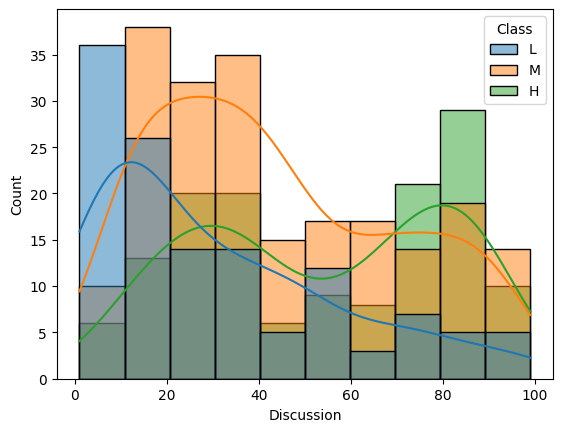

In [ ]:
sns.histplot(x='Discussion', data=df, hue='Class', hue_order=['L','M','H'], kde=True)

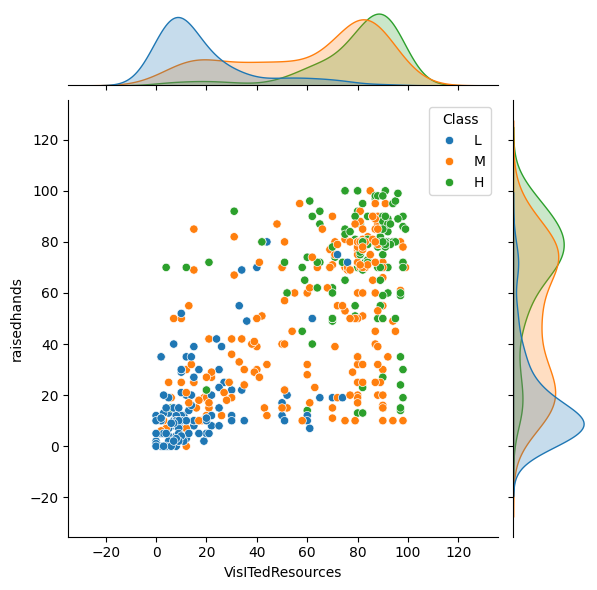

In [ ]:
sns.jointplot(x='VisITedResources', y='raisedhands',data=df, hue='Class', hue_order=['L','M','H'] )

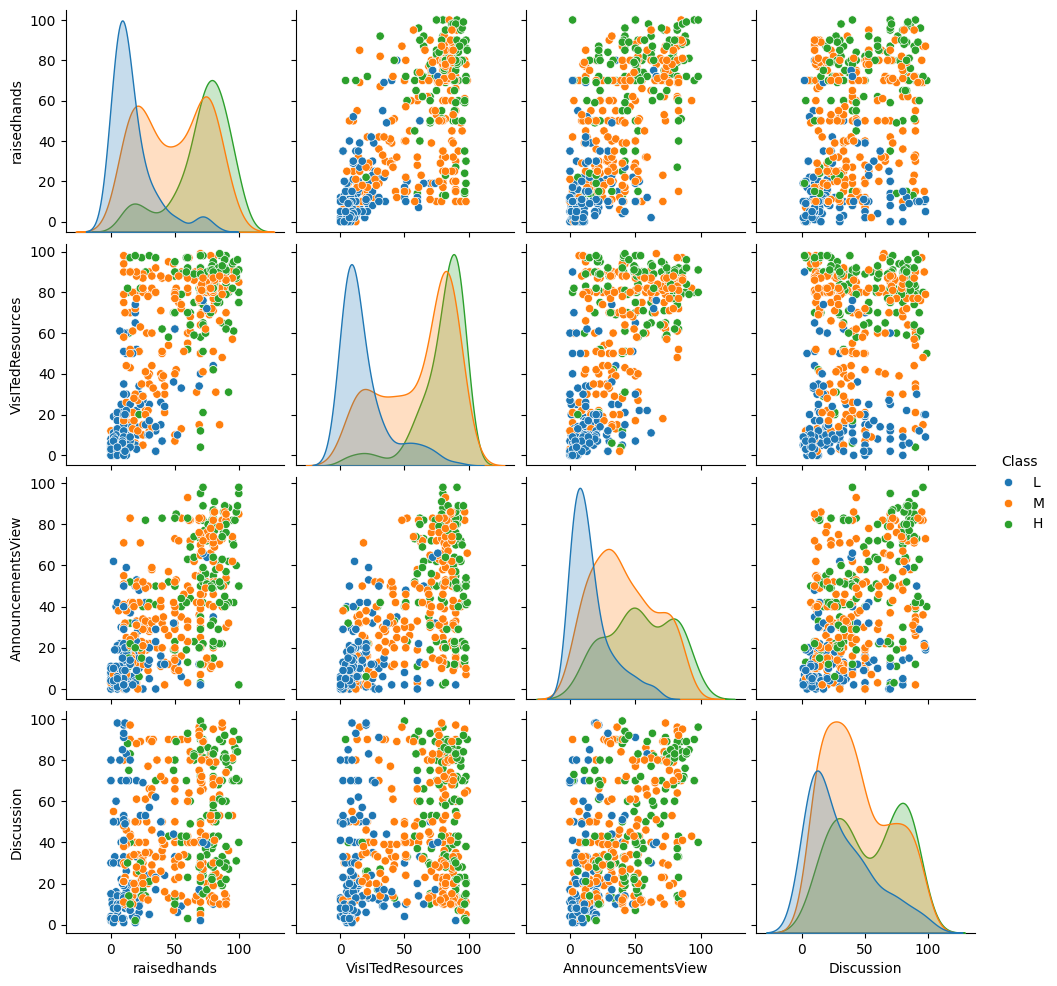

In [ ]:
sns.pairplot(df, hue='Class', hue_order=['L','M','H'])
#상관관계는 낮지만 피쳐가 두 개를 나누는데는 도움이 된다. 분석하고자 하는 대상과 상관관계가 높으면 좋지만 요소끼리는 상관관계가 낮을 수록 좋다. 왜냐하면 서로 영향을 안주니까.
#Visited 하고 raisehands 가 그럼.

<Axes: xlabel='Class', ylabel='count'>

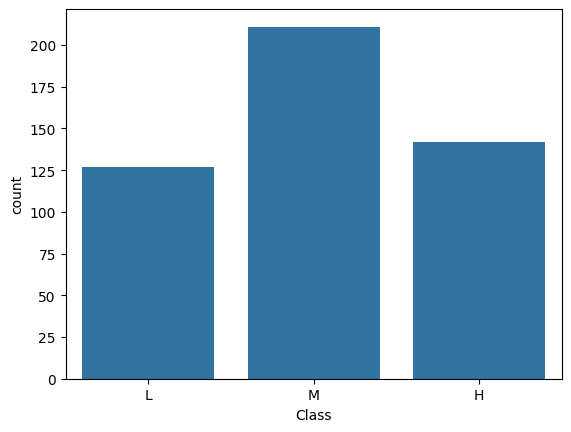

In [ ]:

sns.countplot(x='Class', data=df, order=['L', 'M', 'H'])




<Axes: xlabel='gender', ylabel='count'>

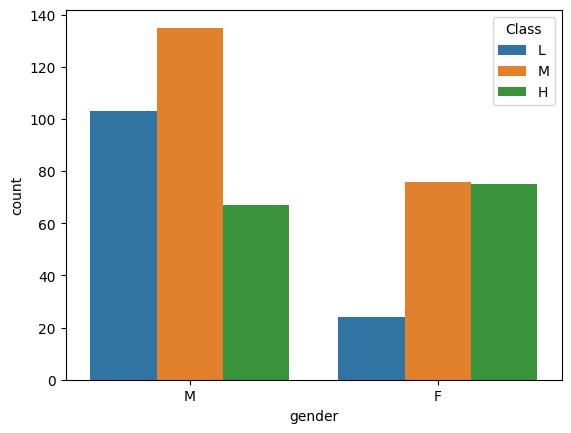

In [ ]:
sns.countplot(x='gender', data=df, hue='Class', hue_order=['L','M','H'])

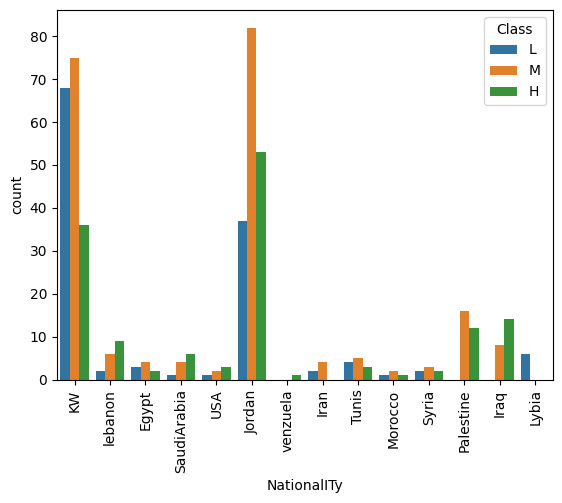

In [ ]:
sns.countplot(x='NationalITy', data=df, hue='Class', hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.show()


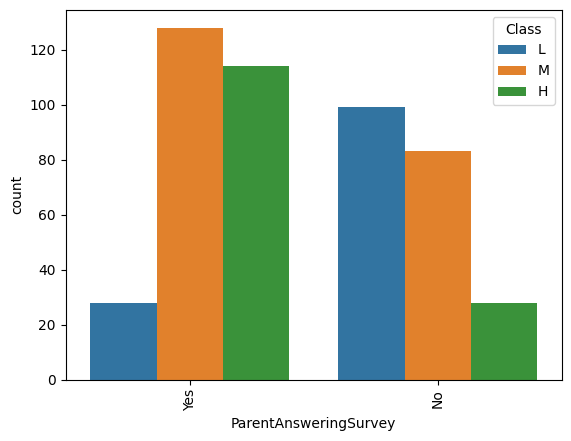

In [ ]:
sns.countplot(x='ParentAnsweringSurvey', data=df, hue='Class', hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.show()

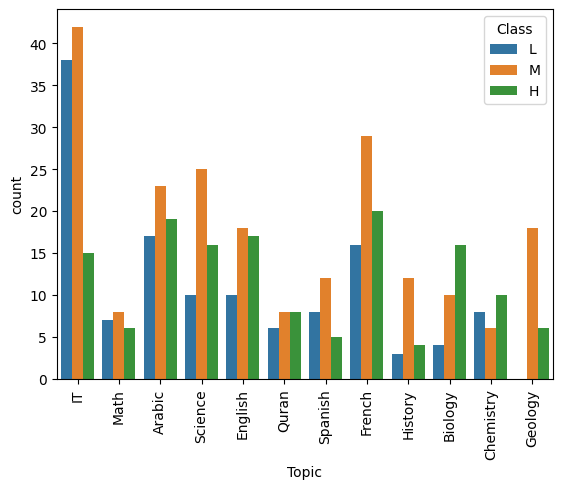

In [ ]:
sns.countplot(x='Topic', data=df, hue='Class', hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# L, M, H를 숫자로 바꾸어 표현하기 (eg. L: -1, M: 0, H:1)

df['Class_value'] = df['Class'].map(dict(L=-1, M=0, H=1))
df.head()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


<ipython-input-31-813607504878>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gb_gender= df.groupby('gender').mean()['Class_value']


<BarContainer object of 2 artists>

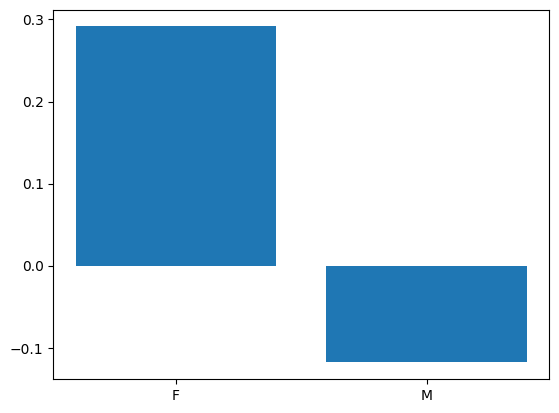

In [ ]:

gb_gender= df.groupby('gender').mean()['Class_value']

gb_gender
plt.bar(gb_gender.index, gb_gender)




<ipython-input-32-3057fdaf4c50>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gb_gender= df.groupby('Topic').mean()['Class_value'].sort_values()


<BarContainer object of 12 artists>

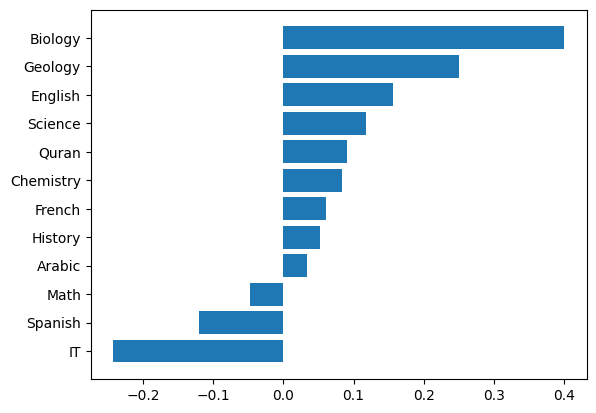

In [ ]:
gb_gender= df.groupby('Topic').mean()['Class_value'].sort_values()

plt.barh(gb_gender.index, gb_gender)

<ipython-input-33-c751a2b669ce>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gb_gender= df.groupby('StudentAbsenceDays').mean()['Class_value'].sort_values()


<BarContainer object of 2 artists>

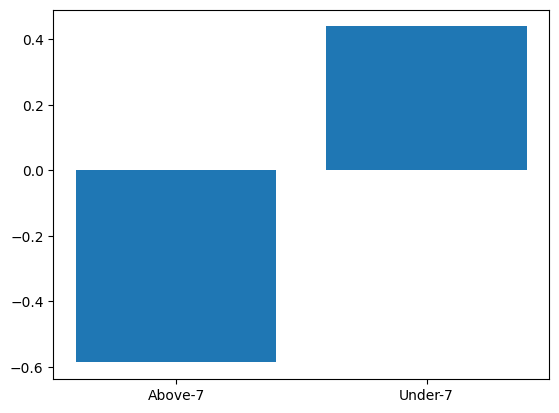

In [ ]:
gb_gender= df.groupby('StudentAbsenceDays').mean()['Class_value'].sort_values()

plt.bar(gb_gender.index, gb_gender)


In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_value'],
      dtype='object')

In [ ]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기

X = pd.get_dummies(df.drop(['ParentschoolSatisfaction','Class','Class_value'], axis=1),
                   columns=['gender', 'NationalITy', 'PlaceofBirth',
                                'StageID', 'GradeID','SectionID', 'Topic', 'Semester', 'Relation',
                                'ParentAnsweringSurvey','StudentAbsenceDays'], drop_first=True)
y = df['Class']



In [ ]:
X

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
1,20,20,3,25,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
2,10,7,0,30,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
476,50,77,14,28,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
477,55,74,25,29,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
478,30,17,14,57,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 4. Classification model training



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)




LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))




              precision    recall  f1-score   support

           H       0.77      0.67      0.72        55
           L       0.79      0.79      0.79        33
           M       0.60      0.68      0.64        56

    accuracy                           0.70       144
   macro avg       0.72      0.71      0.71       144
weighted avg       0.71      0.70      0.70       144



In [ ]:
from xgboost import XGBClassifier

In [ ]:
class_mapping = {'H': 0, 'L': 1, 'M': 2}
y_train = y_train.map(class_mapping)
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:

class_mapping = {'H': 0, 'L': 1, 'M': 2}
y_test = y_test.map(class_mapping)
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))
#XGB는 기대 클래스에 문자열 범주형 카테고리 못 읽음. class mapping을 통해 바꿔줘야 됨.



              precision    recall  f1-score   support

           0       0.79      0.69      0.74        55
           1       0.82      0.85      0.84        33
           2       0.65      0.71      0.68        56

    accuracy                           0.74       144
   macro avg       0.75      0.75      0.75       144
weighted avg       0.74      0.74      0.74       144



In [ ]:
model_lr.classes_

array(['H', 'L', 'M'], dtype=object)

In [ ]:
model_lr.coef_.shape #3은 클래스, 59는 features

(3, 59)

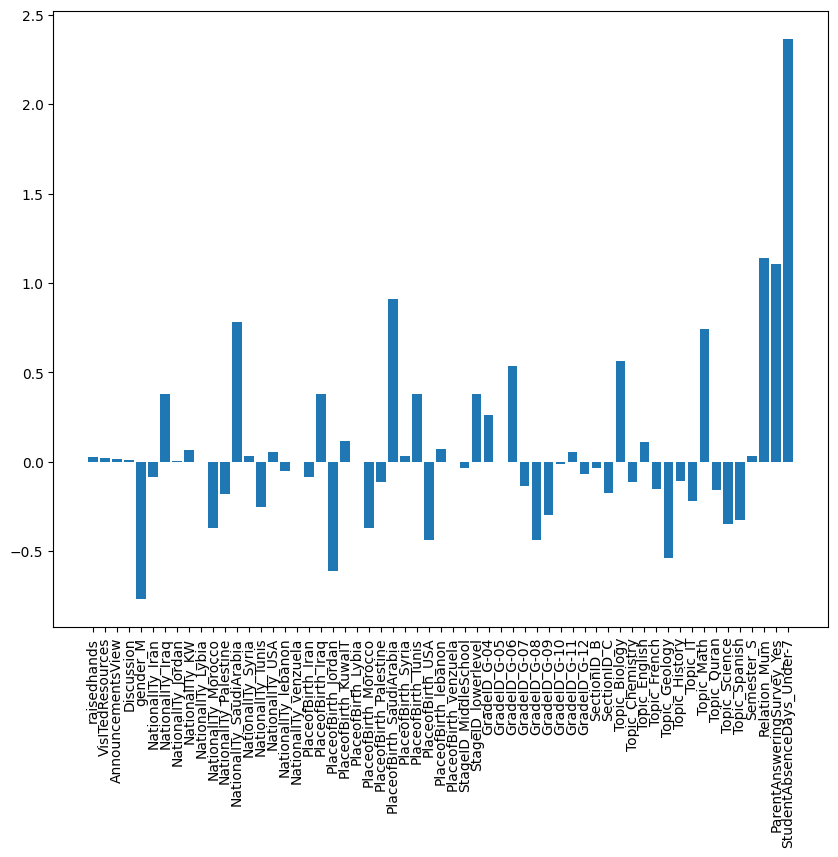

In [ ]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(10,8))
plt.bar(X.columns, model_lr.coef_[0, :]) #성적을 좋게 하는 요소
plt.xticks(rotation=90)
plt.show()




양으로 올라갈 수록 클래스와 상관관계가 높은 것
여러개의 피쳐가 교호작용을 할 수록 성적이 높을 확률이 높다는 뜻


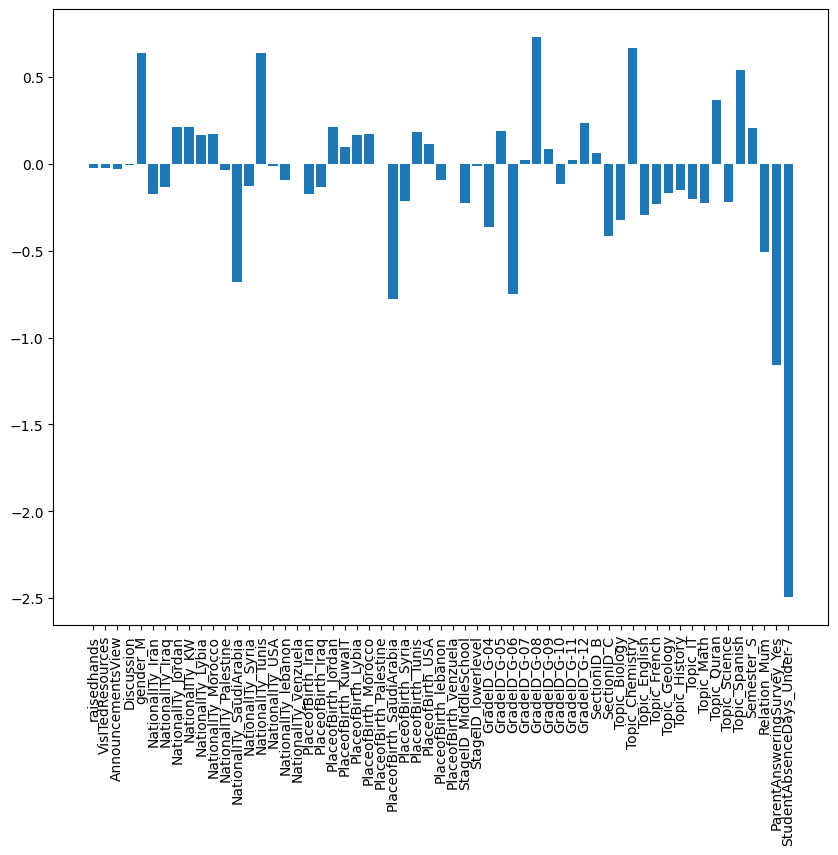

In [ ]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(10,8))
plt.bar(X.columns, model_lr.coef_[1, :]) #성적을 안 좋게 하는 요소
plt.xticks(rotation=90)
plt.show()

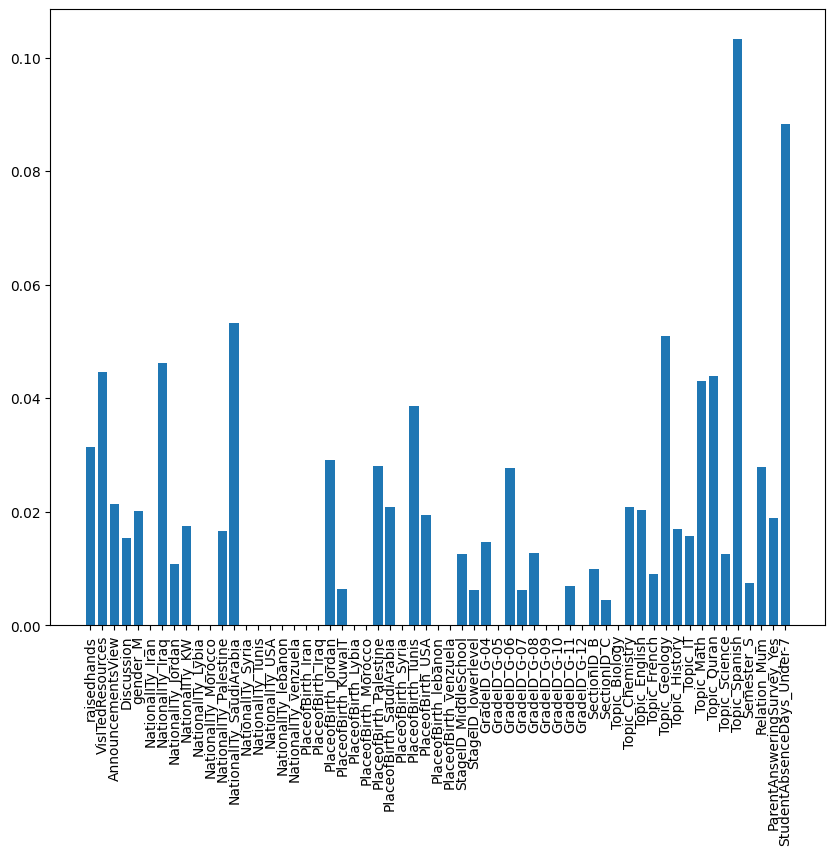

In [ ]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
fig = plt.figure(figsize=(10,8))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()



